 # Jeppe Druedahl & Thomas Høgholm Jørgensen (2017)

 # "[A general endogenous grid method for multi-dimensional models with non-convexities and constraints](https://www.sciencedirect.com/science/article/pii/S0165188916301920?via%3Dihub)"

In [1]:
import time
import numpy as np
from HARK.G2EGM.mcnab import MCNAB
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sbn

In [2]:
# Calibration & Setup

params = {
    # Model parameters #
    
    'T': 20, # Number of periods in life
    'Ra': 1.02, # Returns on asset A
    'Rb': 1.04, # Returns on asset B
    'DiscFac': 0.98, # Time discount factor
    'CRRA': 2.0, # Coefficient of relative risk aversion
    'alpha': 0.25, # Labor disutility
    'y': 0.5, # Retirement income
    'eta': 1.0, # Pre-retirement income
    'chi': 0.1, # Transfer cost parameter
    'sigma': 0.0, # Taste shock variance/smoothing parameter
    'verbose': True, # Print solution progress
    
    # Grid and interpolation parameters #
    
    # Common regular grids
    'mlims': (1e-6, 10.0), 'Nm': 100, # m grid
    'nlims': (1e-6, 12.0), 'Nn': 100, # n grid
    'n_phi': 1.25,
    # Post decision grids
    'alims': (1e-6, 8.0), # a grid
    'blims': (1e-6, 14.0), # b grid
    'posdec_factor': 2,
    # retirement grids
    'mlims_ret': (1e-6, 50.0), 'Nm_ret': 500, # m grid when retired (last period)
    'alims_ret': (1e-6, 25.0), 'Na_ret': 500, # a grid when retired
    # interpolation
    'interp_factor': 2}

In [3]:
# Agent creation and solution

model = MCNAB(**params)
t = time.time()
model.solve()
elapsed = time.time() - t
print("Solution took %f seconds" % elapsed)


Solving retired persons sub-problem
Solving working persons sub-problem
... solving working problem
... solving unconstrained segment
ucon segment time: 2.348151
... solving fully constrained segment
con segment time: 0.040761
... solving deposit constrained segment
dcon segment time: 0.081742
... solving post-decision cash-on-hand constrained segment
Time after segmentUpper: 1.356692
acon segment time: 1.364751
Period solved in 3.996084 seconds

Solving retired persons sub-problem
Solving working persons sub-problem
... solving working problem
... solving unconstrained segment
ucon segment time: 0.041327
... solving fully constrained segment
con segment time: 0.068964
... solving deposit constrained segment
dcon segment time: 0.115948
... solving post-decision cash-on-hand constrained segment
Time after segmentUpper: 0.195281
acon segment time: 0.195281
Period solved in 0.573941 seconds

Solving retired persons sub-problem
Solving working persons sub-problem
... solving working probl

ucon segment time: 0.143433
... solving fully constrained segment
con segment time: 0.040884
... solving deposit constrained segment
dcon segment time: 0.130852
... solving post-decision cash-on-hand constrained segment
Time after segmentUpper: 0.174675
acon segment time: 0.174675
Period solved in 0.615160 seconds
Solution took 15.879663 seconds


In [4]:

def plot_optimal_segment(model, period):
    
    # Extract working solution
    working_sol = model.solution[period].ws
    
    # Extract mesh
    M = working_sol.M
    N = working_sol.N
    
    # Extract boolean arrays indicating what 'segment' is best in each mesh 
    # point
    best_ucon = working_sol.ucon[5]
    best_con = working_sol.con[5]
    best_acon = working_sol.acon[5]
    best_dcon = working_sol.dcon[5]
    
    # The order in which this is done is very important.
    # The 'best' matrices are created sequentially. So 'UCON' does not
    # incorporate 'ACON's values in declaring its the best.
    indicators = [best_ucon, best_con, best_dcon, best_acon]
    labels = ['UCON','CON','DCON','ACON']
    best = np.array([['None']*M.shape[1]]*M.shape[0])
    for k in range(len(indicators)):
        best[indicators[k]] = labels[k]
    
    # Create a dataframe to pass to seaborn
    plotData = pd.DataFrame({'M': M.flatten(),
                             'N': N.flatten(),
                             'Best': best.flatten()})
    # Plot
    sbn.scatterplot(x="M", y="N", hue="Best", data=plotData,
                    linewidth = 0)
    plt.title('Period: {period}'.format(period = period))
    plt.show()

def plot_retirement_decision(model, period):
    
    # Extract working solution
    sol = model.solution[period]
    
    # Extract mesh
    M = model.grids.M
    N = model.grids.N
    
    # Probability
    Pr_1 = sol.Pr_1
    
    # Plot
    f, ax = plt.subplots()
    points = ax.scatter(M, N, c=Pr_1, linewidth = 0)
    ax.set_title('Period: {period}'.format(period = period))
    ax.set_xlabel('M')
    ax.set_ylabel('N')
    cbar = f.colorbar(points)
    cbar.set_label('Probability of working')

def plot_pension_contrib(model, period):
    
    # Extract working solution
    sol = model.solution[period].ws
    
    # Extract mesh
    M = model.grids.M
    N = model.grids.N
    
    # Contribution
    Dmesh = sol.dMesh
    
    # Plot
    f, ax = plt.subplots()
    points = ax.scatter(M, N, c=Dmesh, linewidth = 0)
    ax.set_title('Period {period} Pension contribution d'.format(period = period))
    ax.set_xlabel('M')
    ax.set_ylabel('N')
    cbar = f.colorbar(points)
    cbar.set_label('d: Pension Contribution')

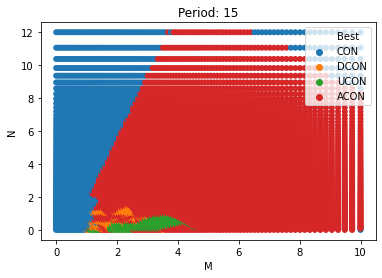

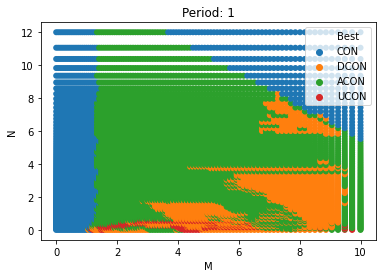

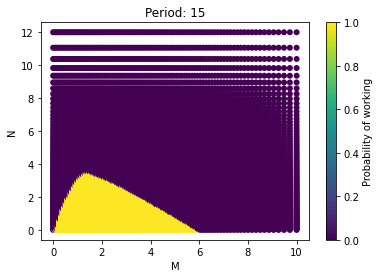

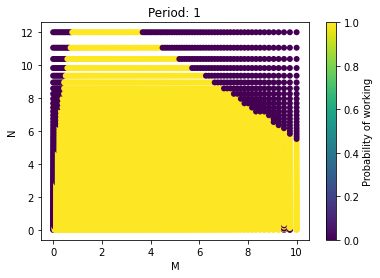

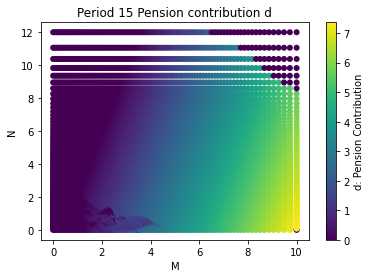

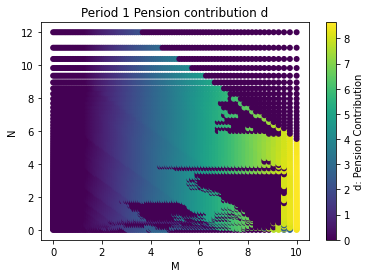

In [5]:
T = params['T']
periods = [T-5, T-19]

for period in periods:
    plot_optimal_segment(model, period)

for period in periods:
    plot_retirement_decision(model, period)
    
for period in periods:
    plot_pension_contrib(model, period)